<a href="https://colab.research.google.com/github/Deven876/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

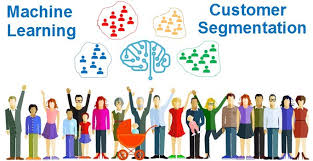

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Architecture

Data Preparation and Exploratory Data Analysis > Build Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import math
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [3]:
# importing dataset 
file='/content/drive/MyDrive/capstone 4 customer segmentation/Online Retail.xlsx'
data1=pd.read_excel(file)
data=data1.copy()

# **Data Inspection**

In [4]:
# First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Shape of dataset
shape=data.shape
print('Number of rows: ',shape[0])
print('Number of Columns: ',shape[1])


Number of rows:  541909
Number of Columns:  8


In [7]:
## Dataset Information(Dtype ,Null count, Non-null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Descriptive summary of dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- The max and min value of Quantity are both 80995; it could represent a reversal of data entry.
- Negative UnitPrice It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. 

In [9]:
# Looking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Missing 25% of CustomerID.
- Missing 0.3% of descriptions.

In [10]:
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [11]:
# Looking for Unique Values
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# Handling Missing Values

In [12]:
# Dropping missing values
data=data[pd.notnull(data['CustomerID'])]
data=data[pd.notnull(data['Description'])]
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data=data[~data['InvoiceNo'].str.contains('C')]

In [13]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Eda and Data Preprocessing**

### 1. **Stockcode**

In [14]:
Stockcode_data=data['StockCode'].value_counts().reset_index()
Stockcode_data.rename(columns={'index': 'StockCode_Name'}, inplace=True)
Stockcode_data.rename(columns={'StockCode': 'Count'}, inplace=True)
Stockcode_data.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


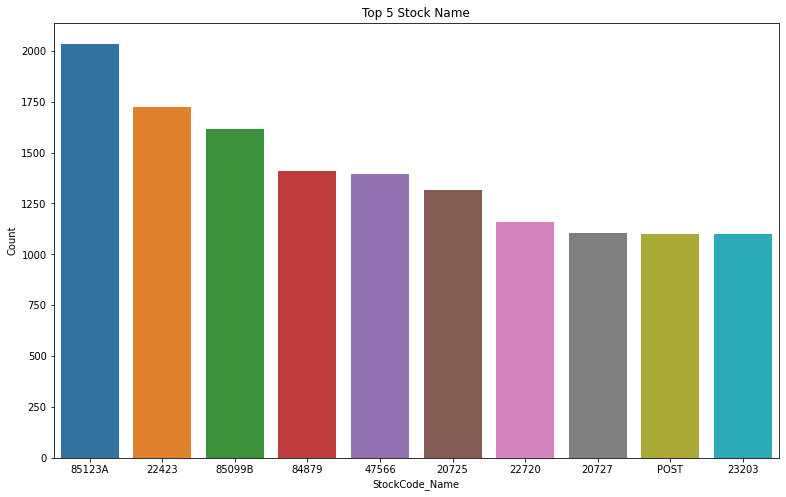

In [15]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_data[:10])

### 2.**Invoice Date**

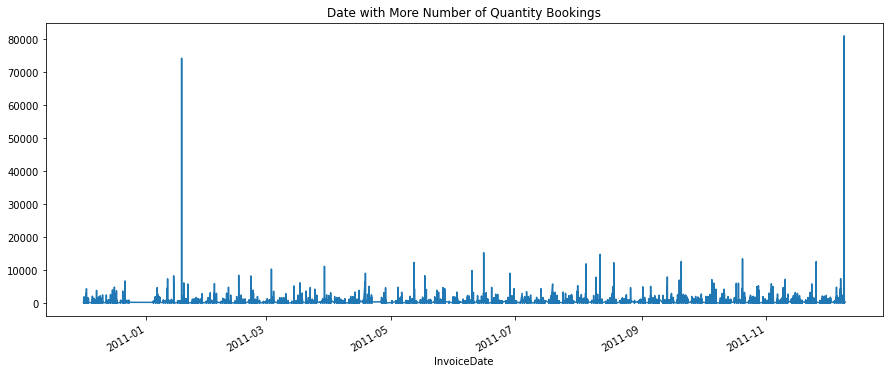

In [16]:
data.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))
plt.title('Date with More Number of Quantity Bookings')
plt.show()

### 3.**Country**

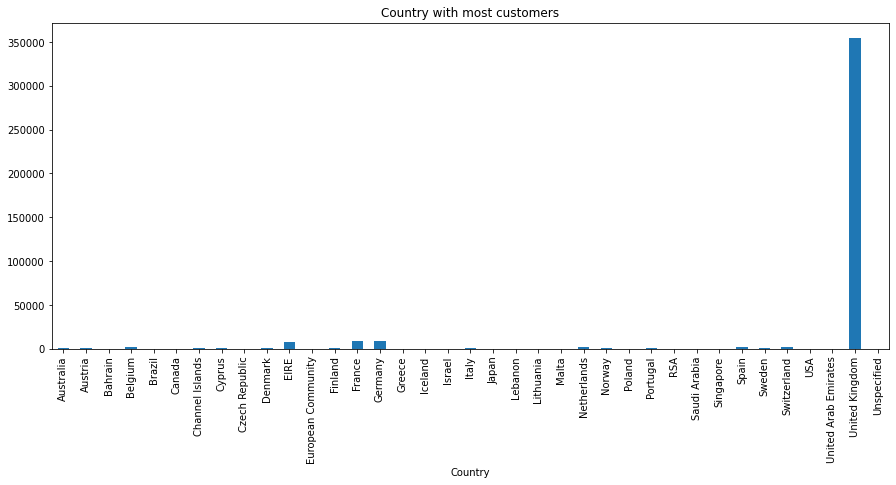

In [17]:
data.groupby('Country').count()['CustomerID'].plot.bar(figsize=(15,6))
plt.title('Country with most customers')
plt.show()

## **Extracting Features from Datetime**

In [20]:
from datetime import datetime
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['Month']=data['InvoiceDate'].dt.month
data['Day']=data['InvoiceDate'].dt.day
data['Hour']=data['InvoiceDate'].dt.hour

### **Hourly Sale**s

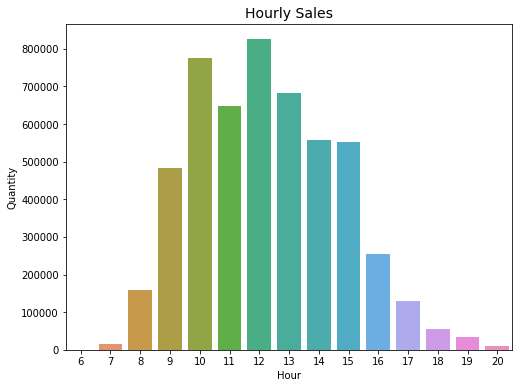

In [22]:
hourly_sales = data[['Hour', 'Quantity']].groupby('Hour').sum()
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

- The majority of the sales happens in between 10am to 3pm.

### **Daily Sales**

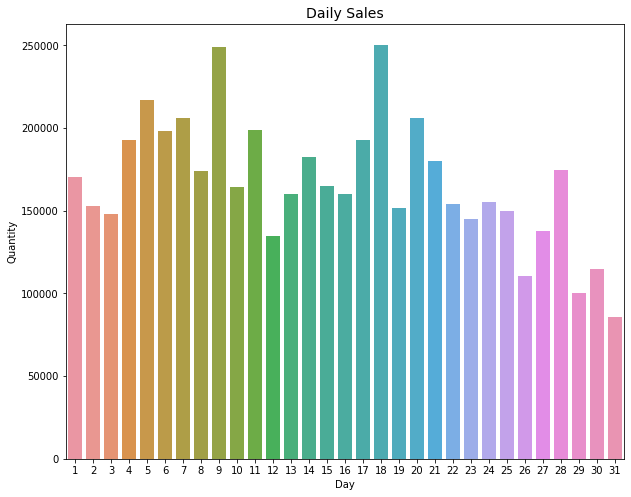

In [23]:
daily_sales = data[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(daily_sales.index, daily_sales['Quantity'])

- sales are low during month end.

### **Monthly sales**

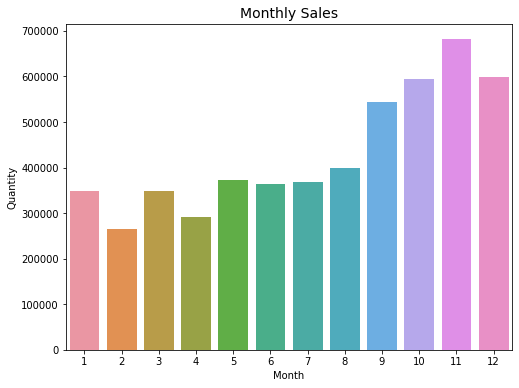

In [24]:
monthly_sales = data[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(8,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])

- Sales are gradually increasing as year end approaches.

# **Feature Engineering and Data Cleaning**

In [28]:
#Keep only United Kingdom data
data = data.query("Country=='United Kingdom'").reset_index(drop=True)

In [29]:
#Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [30]:
#Add new column depicting total amount
data['TotalAmount'] =data['Quantity'] * data['UnitPrice']

Recency, Frequency, and Monetary (RFM) Segmentation

RFM is a behavioural customer segmentation for measuring customer value.

- Receny: How recent was each customer's last purchase

- Frequency: How many times the customer purchased in the last 12 months

- Monetary Value: How much has the customer spent in the last 12 months

In [31]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMscores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMscores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


## **RFM scores**

### **Recency**

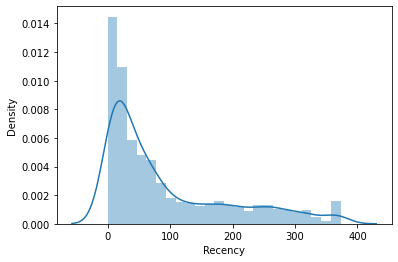

In [32]:
#Recency distribution plot
sns.distplot(RFMscores.Recency)

In [33]:
#Descriptive Statistics (Recency)
RFMscores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

### **Frequency**

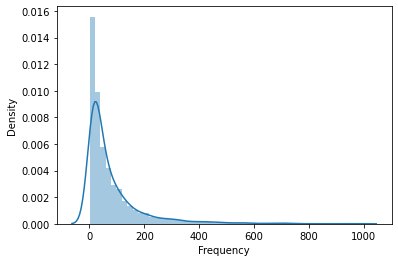

In [34]:
#Frequency distribution plot
sns.distplot(RFMscores.query('Frequency < 1000')['Frequency'])



In [35]:
#Descriptive Statistics (Frequency)
RFMscores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

### **Monetary**

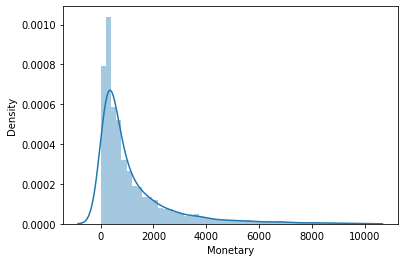

In [36]:
#Monateray distribution plot
sns.distplot(RFMscores.query('Monetary < 10000')['Monetary'])

In [37]:
#Descriptive Statistics (Monetary)
RFMscores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

In [38]:
#Split into four segments using quantiles
qtl = RFMscores.quantile(q=[0.25,0.5,0.75])
qtl = qtl.to_dict()

In [39]:
qtl

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [40]:
#Functions to create R, F and M segments
def RS(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FS(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [41]:
#Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMscores['R'] = RFMscores['Recency'].apply(RS, args=('Recency',qtl,))
RFMscores['F'] = RFMscores['Frequency'].apply(FS, args=('Frequency',qtl,))
RFMscores['M'] = RFMscores['Monetary'].apply(FS, args=('Monetary',qtl,))
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [42]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMscores['RFMGroup'] = RFMscores.R.map(str) + RFMscores.F.map(str) + RFMscores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMscores['RFMScore'] = RFMscores[['R', 'F', 'M']].sum(axis = 1)
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


# **Data Preprocessing For Model Building**

In [43]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

## **Normalization And Scaling**

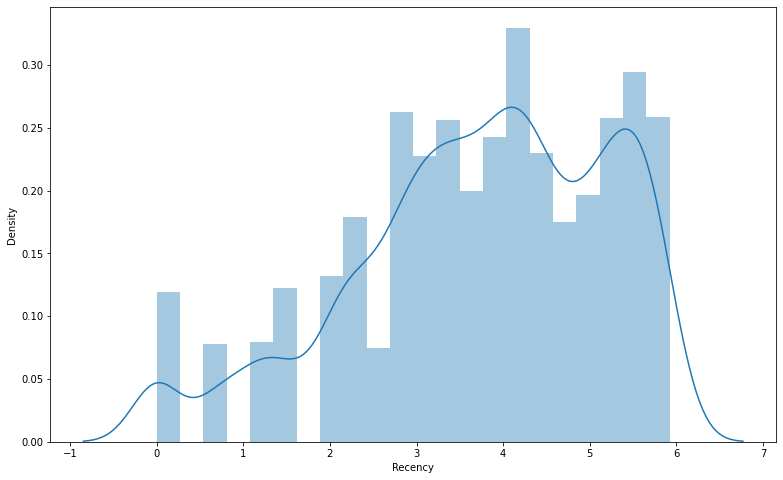

In [44]:
#Data distribution after data normalization for Recency
plt.figure(figsize=(13,8))
sns.distplot(Log_Data['Recency'])

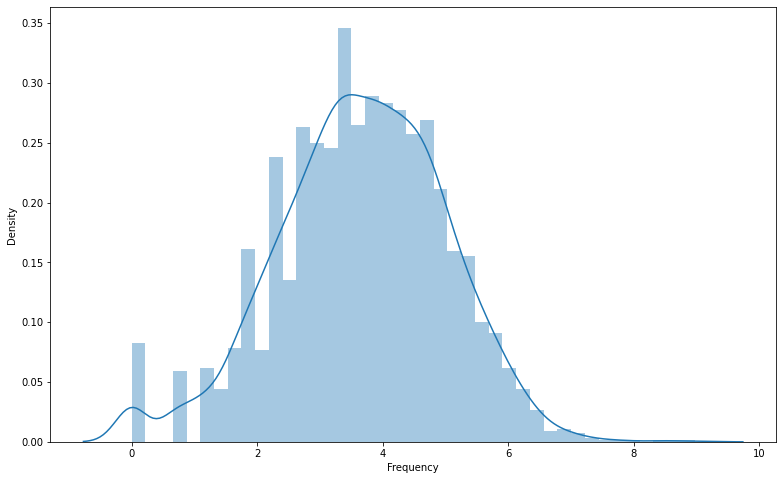

In [45]:
#Data distribution after data normalization for Frequency
plt.figure(figsize=(13,8))
sns.distplot(Log_Data.query('Frequency < 1000')['Frequency'])

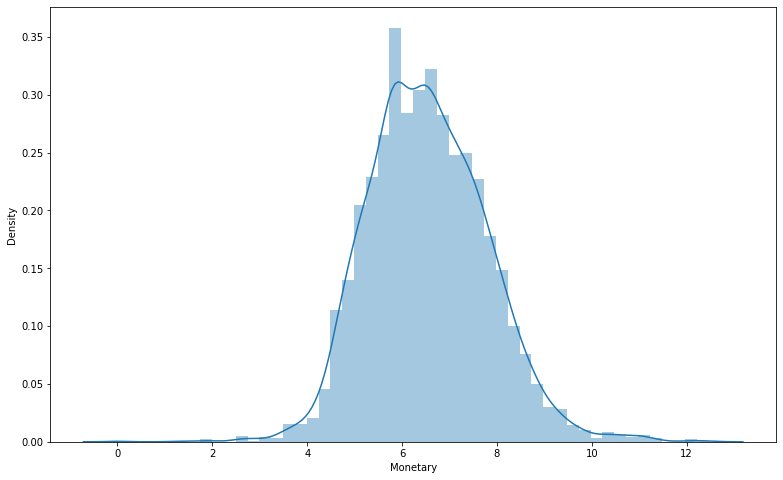

In [46]:
#Data distribution after data normalization for Monetary
plt.figure(figsize=(13,8))
sns.distplot(Log_Data.query('Monetary < 10000')['Monetary'])

In [47]:
from sklearn.preprocessing import StandardScaler

#Bring data on same scale
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(Log_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMscores.index, columns = Log_Data.columns)

# **Kmeans Clustering**

Finding Optimal Number of Clusters

There are two primary methods to define number of clusters:

Elbow criterion (visual method)
Plot number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster cente

Silhouette Score (math method)
Measures intra- and inter-cluster distance

In [54]:
def optimal_kmeans(dataset, start=2, end=11):
   
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = (silhouette_score(dataset, labels, random_state=1))
        inertia_score = (kmeans.inertia_)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1])))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.39562494982602087, SS Delta: 0.0, Inertia: 6226.760687601405, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.30546474589014033, SS Delta: -0.09016020393588053, Inertia: 4796.772651454492, Inertia Delta: -1429.9880361469131
No. Clusters: 4, Silhouette Score(SS): 0.2979659962043153, SS Delta: -0.007498749685825035, Inertia: 4042.1901230940202, Inertia Delta: -754.5825283604718
No. Clusters: 5, Silhouette Score(SS): 0.27848314428200477, SS Delta: -0.01948285192231053, Inertia: 3413.012879507399, Inertia Delta: -629.1772435866214
No. Clusters: 6, Silhouette Score(SS): 0.277253271539764, SS Delta: -0.0012298727422407896, Inertia: 3061.7380462406927, Inertia Delta: -351.2748332667061
No. Clusters: 7, Silhouette Score(SS): 0.2587736809276228, SS Delta: -0.01847959061214116, Inertia: 2779.0419025912724, Inertia Delta: -282.69614364942026
No. Clusters: 8, Silhouette Score(SS): 0.2620030100639916, SS Delta: 0.003229329136368808, Inertia: 2556

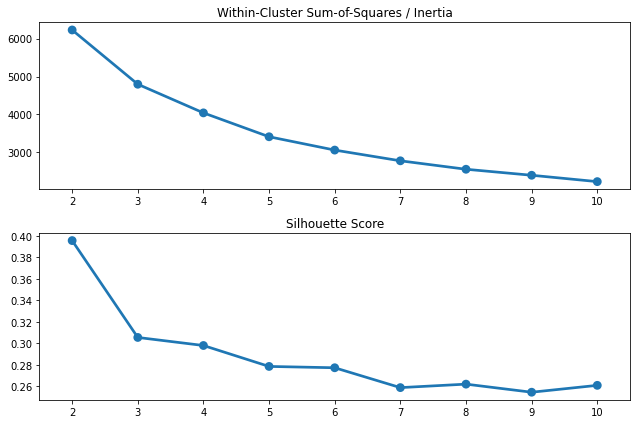

In [55]:
optimal_kmeans(Scaled_Data)

In [56]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,2
12747.0,2,103,4196.01,1,1,1,111,3,0
12748.0,1,4596,33719.73,1,1,1,111,3,0
12749.0,3,199,4090.88,1,1,1,111,3,0
12820.0,3,59,942.34,1,2,2,122,5,0


<Figure size 504x504 with 0 Axes>

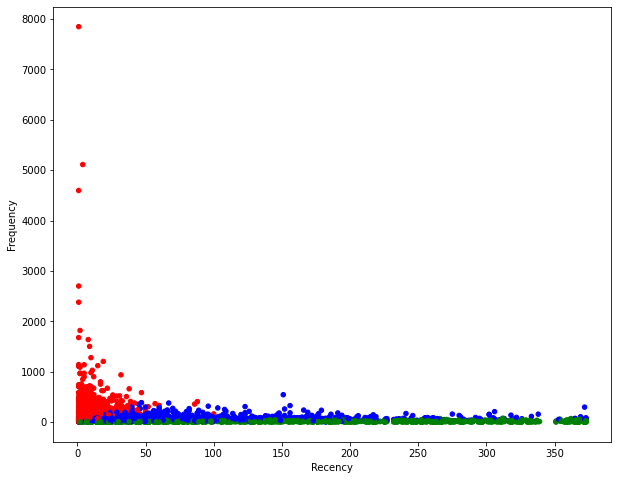

In [57]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMscores['Color'] = RFMscores['Cluster'].map(lambda p: Colors[p])
ax = RFMscores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMscores['Color']
)